<a href="https://colab.research.google.com/github/sizakele96/Beauty-Mtsweni/blob/main/Team_CB1_Classification_Predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Climate Change Belief Analysis 2022**

By **Team_CB1**

##**Introduction**





Many companies are built around lessening one’s environmental impact or carbon footprint. They offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. They would like to determine how people perceive climate change and whether or not they believe it is a real threat. This would add to their market research efforts in gauging how their product/service may be received.

Twitter data (commonly know as tweets) is a incredibly powerful source of information on an extensive list of topics. This data will be analyzed to find trends related to climate change, measure popular sentiment, obtain feedback on past desicions and also help make future desicions.

With this context, We  challenging ourselves with the task of creating a Machine Learning model that is able to classify whether or not a person believes in climate change, based on their novel tweet data.

Providing an accurate and robust solution to this task gives companies access to a broad base of consumer sentiment, spanning multiple demographic and geographic categories - thus increasing their insights and informing future marketing strategies.


<a id="cont"></a>

## **Table of Contents**

<a href=#one>1. Intro to Comet</a>

<a href=#two>2. Importing Libraries</a>

<a href=#three>3. Loading Dataset</a>

<a href=#four>4. Data Preprocessing</a>

<a href=#five>5. Eploratory Data Analysis (EDA)</a>

<a href=#six>6. Feature Engineering and Selection</a>

<a href=#seven>7. Model Selection</a>

<a href=#eight>8. Model Evaluation</a>

<a href=#nine>9. References</a>


<a id="one"></a>
# 1. **Comet**
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Comet ⚡ |
| :--------------------------- |
| In this section will section we will import the comet experiment from comet.ml and decribe what comet is.
---


In [19]:
!pip install comet_ml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [20]:
from comet_ml import Experiment

In [21]:
# Import comet_ml at the top of your file
from comet_ml import Experiment

# Create an experiment with your api key
experiment = Experiment(
    api_key="A59LhcaGXTIczySQz8LadDuxT",
    project_name="general",
    workspace="sizakele962",
)

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/sizakele962/general/6d48f235c30345b48ef67c0e3fd53caf
COMET INFO:   Others:
COMET INFO:     notebook_url : https://colab.research.google.com/notebook#fileId=1yzhbneX82K6qNBAFnPVrFCcg8dR1kXhx
COMET INFO:   Uploads:
COMET INFO:     environment details : 1
COMET INFO:     filename            : 1
COMET INFO:     installed packages  : 1
COMET INFO:     notebook            : 2
COMET INFO:     os packages         : 1
COMET INFO:     source_code         : 1
COMET INFO: ---------------------------
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET ERROR: Failed to calculate active processors count. Fall back to default CPU count 1



<a id="two"></a>
# **2. Importing Libraries**
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description:  Libraries ⚡ |
| :--------------------------- |
| In this section will section we will import libraries machine leaning we will use in this notebook.
---

In [22]:
#from google.colab import drive
#drive.mount('/content/drive')

In [23]:
!pip install nlppreprocess

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [24]:
# Libraries for data loading, data manipulation and data visulisation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from datetime import datetime
%matplotlib inline
import seaborn as sns
import plotly.express as px
import matplotlib as mpl

from statsmodels.graphics.correlation import plot_corr
pd.set_option('max_columns', 200)


#NLP Libraries
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,TreebankWordTokenizer
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer
from os import path
from nlppreprocess import NLP
nlp = NLP()
from PIL import Image
from nltk import pos_tag
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
nltk.download('wordnet')
nltk.download(['punkt','stopwords'])

# Setting global constants to ensure notebook results are reproducible

PARAMETER_CONSTANT = 'Magic String' 

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

# ML Libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import scipy.sparse

#NLP 
from nltk.stem.porter import PorterStemmer

#Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.decomposition import LatentDirichletAllocation as LDA
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.utils import resample
from sklearn.svm import LinearSVC


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



<a id="three"></a>
# 3. **Importing Dataset**
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description:  Dataset ⚡ |
| :--------------------------- |
| In this section we  will be  loading the dataset we are required to  use in this notebook.
---

In [25]:
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [26]:
train_df =  pd.read_csv('train.csv')

#sub = pd.read_csv('/content/drive/MyDrive/sample_submission.csv')

In [27]:
test_df = pd.read_csv('test_with_no_labels.csv')

<a class="anchor" id="#id-section4'"></a>
# 4. **Data Processing**

In [28]:
train_df.head()

sentiment                                            message  tweetid
0          1  PolySciMajor EPA chief doesn't think carbon di...   625221
1          1  It's not like we lack evidence of anthropogeni...   126103
2          2  RT @RawStory: Researchers say we have three ye...   698562
3          1  #TodayinMaker# WIRED : 2016 was a pivotal year...   573736
4          1  RT @SoyNovioDeTodas: It's 2016, and a racist, ...   466954

**Display the Complete Summary of the Dataset**

In [29]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


The summary of the Dataframe(train_df) has a complete dataset, which consist of two integer data types and one object data type. This info will later help us during our cleaning of data.

**Descriptive Statistics** \

The  Dataframe.describe() will:

-  helps us to know about characteristics of the dataset 
-  gives statistical information of all numerical features in our data frame

In [30]:
#description of how messsages are discribed across the  sentiment
train_df.describe()

sentiment        tweetid
count  15819.000000   15819.000000
mean       0.917504  501719.433656
std        0.836537  289045.983132
min       -1.000000       6.000000
25%        1.000000  253207.500000
50%        1.000000  502291.000000
75%        1.000000  753769.000000
max        2.000000  999888.000000

In this case, looking at the tweetid it shown as if it is a statistical datset and that will totally mislead us and also the sentiment consists of categorical values between -1 and 2.This means we cannot use or refer  the above description when doing EDA(cleaning our data)

In [31]:
#looking at the values of sentiment
train_df['sentiment'].unique()

array([ 1,  2,  0, -1])

In [32]:
#check for missing values 
train_df.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

In [33]:
#check for duplicates
train_df.duplicated().sum()

0

There are no missing values in our Dataset.

Since we found that they are no missing values in our dataset, we now going to:
- Check for white space characters
- Sample the tweet
- Vitiualize the Distribution of the target( this will give us a clear understanding of the data before we do our EDA)

In [34]:
#Print the length of the characters 
print(len(train_df['message']))
#Print the sum of white space characters if there is any
print(sum(train_df['message'].apply(lambda x: x.isspace())))

15819
0


We have zero white space characters in our dataset, we can now proceed to vitualizing our data

In [35]:
#WVitualisation quality for all virtual figures

mpl.rcParams['figure.dpi'] = 150


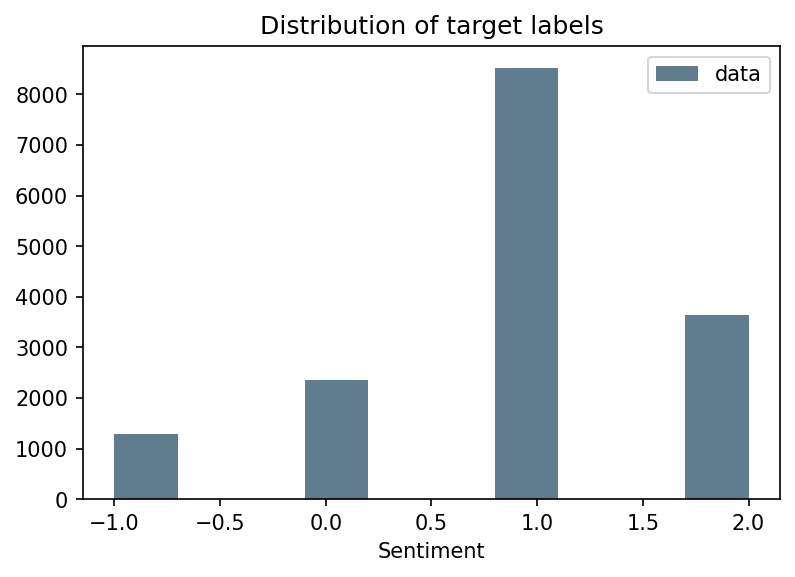

In [36]:
plt.hist(train_df['sentiment'], label='data',color='#607c8e');
plt.legend();
plt.xlabel('Sentiment')
plt.title('Distribution of target labels')
plt.show()


In [37]:
import os
os.getcwd()

'/content'

With the graph above, it shows that we have a inbalaced dataset set, where the positve tweets are largest and which is good, referring to how people can tweet sometimes. In this case, the inbalance tends to be a common problem or threat in machine learning classification where there are a disproportionate ratio of observations in each class.his is can cause problems as most algorithms are designed to maximize accuracy and reduce error, we will then be more careful when treating the inbalanced data in EDA

\

We now going to take a look at the distribution average length of messages for every sentiment to see if there is any there is any similarities.

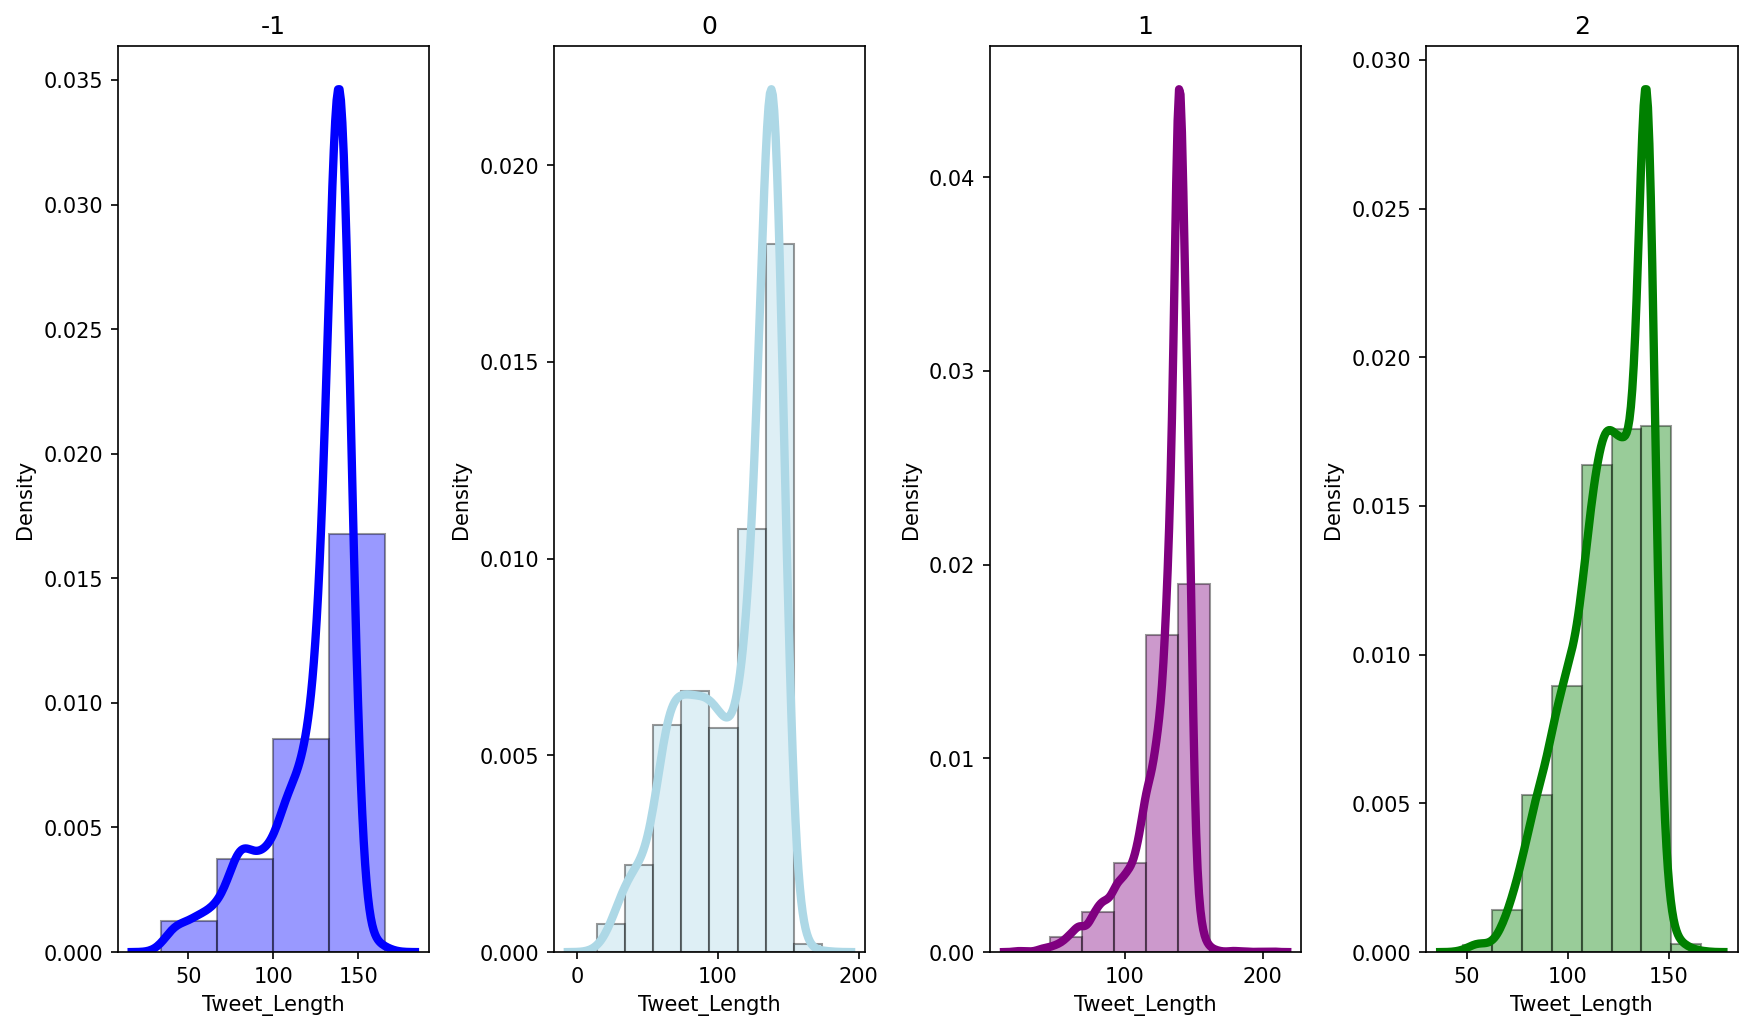

In [38]:
# Distribution plots for the label
fig,(ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize =(12,8))

#For  Negatives
sns.distplot(train_df[train_df['sentiment']==-1]['message'].str.len(), hist=True, kde=True,
             bins=int(100/25), color = 'blue', 
             ax = ax1,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax1.set_title('-1')
ax1.set_xlabel('Tweet_Length')
ax1.set_ylabel('Density')

#For Neutral 
sns.distplot(train_df[train_df['sentiment']== 0]['message'].str.len(), hist=True, kde=True,
             bins=int(200/25), color = 'lightblue', 
             ax = ax2,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax2.set_title('0')
ax2.set_xlabel('Tweet_Length')


#For Positives
sns.distplot(train_df[train_df['sentiment']==1]['message'].str.len(), hist=True, kde=True,
             bins=int(200/25), color = 'purple',  
             ax = ax3,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax3.set_title('1')
ax3.set_xlabel('Tweet_Length')


#For News
sns.distplot(train_df[train_df['sentiment']==2]['message'].str.len(), hist=True, kde=True,
             bins=int(200/25), color = 'green', 
             ax = ax4,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax4.set_title('2')
ax4.set_xlabel('Tweet_Length')
fig.subplots_adjust(left=0, wspace=0.4)
fig.savefig('Distribution plot.jpg', bbox_inches='tight', dpi=150)


The above graphs shows that the length of the tweets are almost equal and that is not a surprise at all since the tweets have limited characters, that is one thing we cannot look at. The interesting part to have a look at is the density, the density constract of graph -1 and 1 seem to be similar, but we cannot conclude by looking this graph as there is so much hidden information, We will start unpacking that in EDA.

<a class="anchor" id='#id-section5'></a>
# 5. **Explotary Data Analysis**



Exploratory Aata Analysis is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task. \
We are going to divide our analysis into three categories:
- **Category 1** will be visualising the uncleaned data unbalanced datasets
- **Catergory 2** visualising the cleaned data with unbalanced datasets
- **Category 3** visualising cleaned data with balanced datasets\
But before doing all that, we need to name  the sentiment data where -1 is negative, 0 is nuetral,1 is positve and 2 is news.This way we believe it will help us understand our visuals better

In [39]:
'''Coping the data into a new data to help us avoid messing up the original data,
      this way it will helps us refresh changes incase we make a mistake'''
new_df = train_df.copy()

In [40]:
# Naming the sentiment data

new_df['Analysis'] = [['Negative', 'Neutral', 'Positive', 'News'][x+1] for x in new_df['sentiment']]

new_df

sentiment                                            message  tweetid  \
0              1  PolySciMajor EPA chief doesn't think carbon di...   625221   
1              1  It's not like we lack evidence of anthropogeni...   126103   
2              2  RT @RawStory: Researchers say we have three ye...   698562   
3              1  #TodayinMaker# WIRED : 2016 was a pivotal year...   573736   
4              1  RT @SoyNovioDeTodas: It's 2016, and a racist, ...   466954   
...          ...                                                ...      ...   
15814          1  RT @ezlusztig: They took down the material on ...    22001   
15815          2  RT @washingtonpost: How climate change could b...    17856   
15816          0  notiven: RT: nytimesworld :What does Trump act...   384248   
15817         -1  RT @sara8smiles: Hey liberals the climate chan...   819732   
15818          0  RT @Chet_Cannon: .@kurteichenwald's 'climate c...   806319   

       Analysis  
0      Positive  
1      Positive  
2          News  
3      Positive  
4      Positive  
...         ...  
15814  Positive  
15815      News  
15816   Neutral  
15817  Negative  
15818   Neutral  

[15819 rows x 4 columns]

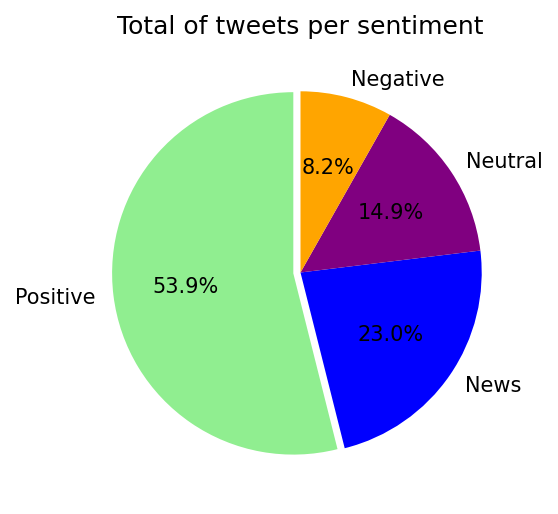

In [41]:
dist = new_df['Analysis'].value_counts()/new_df.shape[0]
labels = (new_df['Analysis'].value_counts()/new_df.shape[0]).index #count the column sentiment
colors = ['lightgreen', 'blue', 'purple', 'orange'] #display the color of the visual
plt.pie(x=dist, labels=labels, autopct='%1.1f%%', startangle=90, explode= (0.04, 0, 0, 0), colors=colors) #label the visual
plt.title('Total of tweets per sentiment') #title of the visual
plt.show() #show the visual

## **Category 1:** 
We will analysing the uncleaned and unbalanced dataset, this will help understand our data more, before cleaning.  

first, let us take a look at t the differences of the sentiment, by counting the total much of tweets each sentiment has, we will plot a graph which will tell us more of what people thought of the climate change.

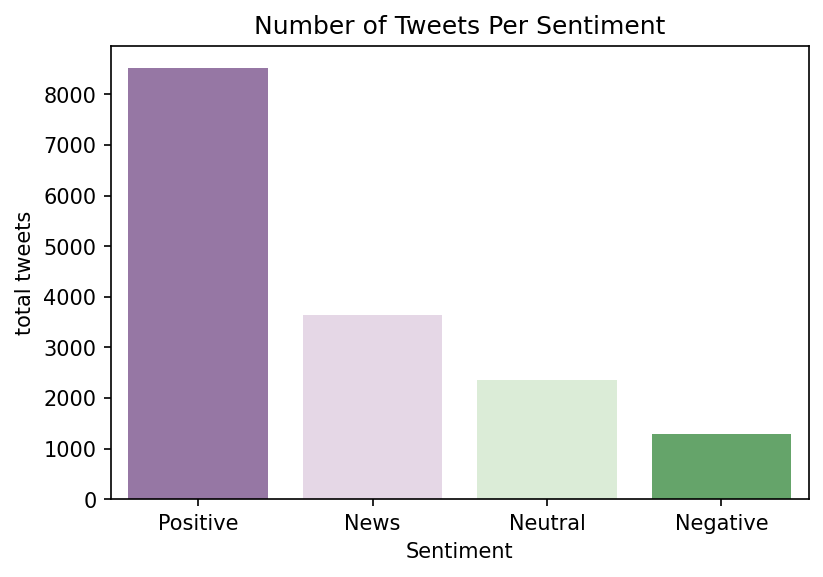

In [42]:
sns.countplot(x='Analysis' ,data = new_df, palette='PRGn')
plt.ylabel('total tweets')
plt.xlabel('Sentiment')
plt.title('Number of Tweets Per Sentiment')
plt.show()

Based on the above graph, it shows that more tweets about the climate change were positive and only few tweets were negative. This concludes the inbalance in our data, which it will make inaccurate accuracy score in our dataset as the model will luckily perform better  with positive sentiment and poorly with negative sentiment, in this case we will have to continue with our analysis as we cannot make decisions based on this analyis.

We going to look at the wordcloud to see the most common words used, this way it will help us understand more about our data 

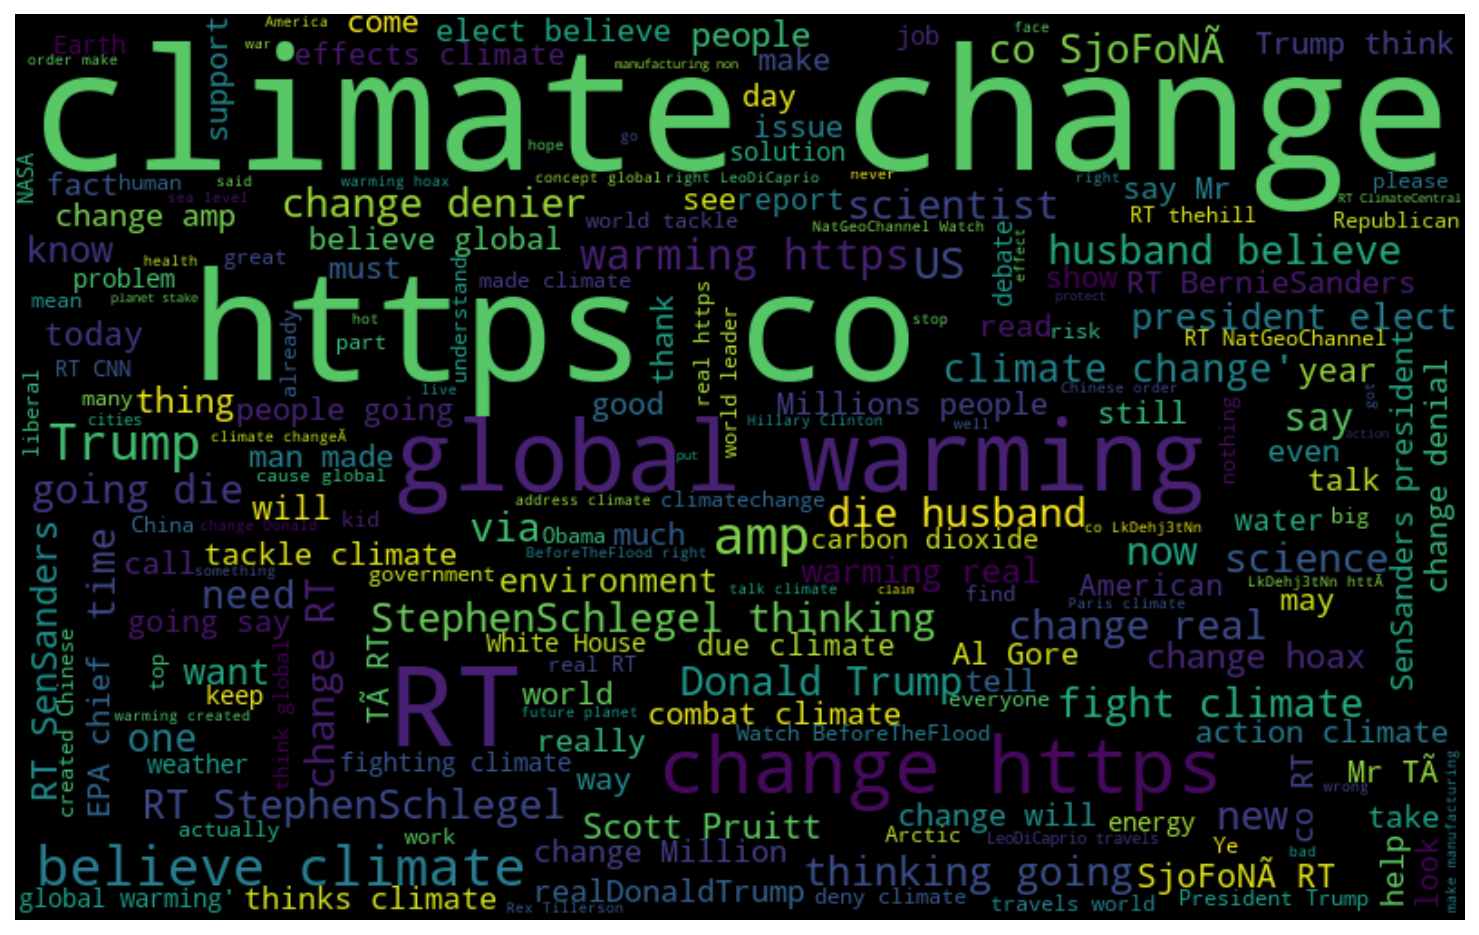

In [43]:
# visualize the frequent words
all_words = " ".join([sentence for sentence in new_df['message']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

The data seem to be messing, so we cannot not make any model predictions based on this kind of data. We first need to remove the links which seem to be the once appearing the most in our data, followed by retweet(RT) and they will not help us when making predictions, the following category will be cleaning clean the data and see how it will look like.

In [44]:
#extract users from the message column
new_df['users'] = [''.join(re.findall(r'@\w{,}', line)) 
                       if '@' in line else np.nan for line in new_df.message]
                       
#count the tweet message per users and group by users
user_counts = new_df[['message', 'users']].groupby('users', as_index = False).count().sort_values(by = 'message', ascending = False)
user_counts.head()

users  message
3410  @StephenSchlegel      307
3270       @SenSanders      243
6182  @realDonaldTrump      143
448     @BernieSanders      121
612               @CNN      106

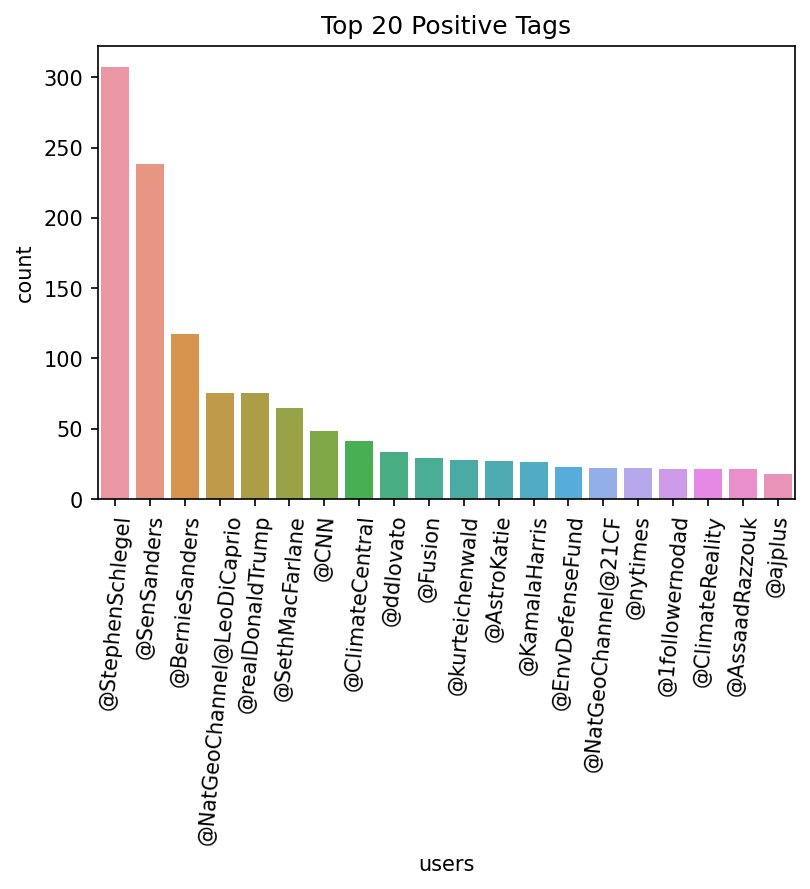

In [45]:
#plot for positive tag
plt.figure(figsize = (6,4))
sns.countplot(x = "users", data = new_df[new_df['Analysis'] == 'Positive'],
              order = new_df[new_df['Analysis'] == 'Positive'].users.value_counts().iloc[:20].index) 

plt.title('Top 20 Positive Tags')
plt.xticks(rotation = 85)
plt.show()

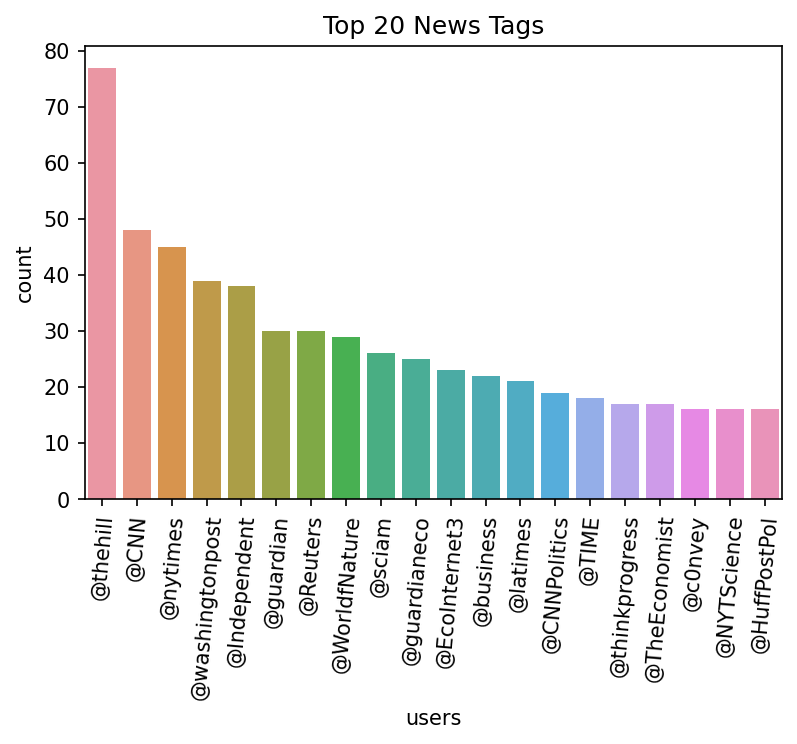

In [46]:
#plot for News tag
plt.figure(figsize = (6,4))
sns.countplot(x = "users", data = new_df[new_df['Analysis'] == 'News'],
              order = new_df[new_df['Analysis'] == 'News'].users.value_counts().iloc[:20].index) 

plt.title('Top 20 News Tags')
plt.xticks(rotation = 85)
plt.show()

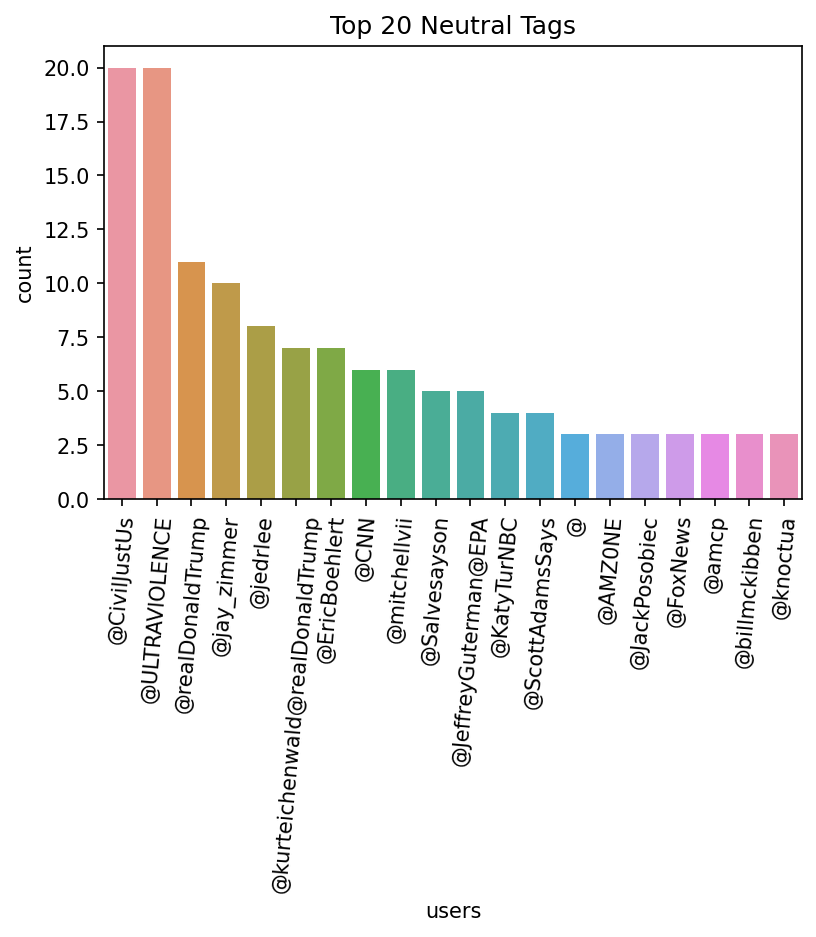

In [47]:
#plot for Neutral tag
plt.figure(figsize = (6,4))
sns.countplot(x = "users", data = new_df[new_df['Analysis'] == 'Neutral'],
              order = new_df[new_df['Analysis'] == 'Neutral'].users.value_counts().iloc[:20].index) 

plt.title('Top 20 Neutral Tags')
plt.xticks(rotation = 85)
plt.show()

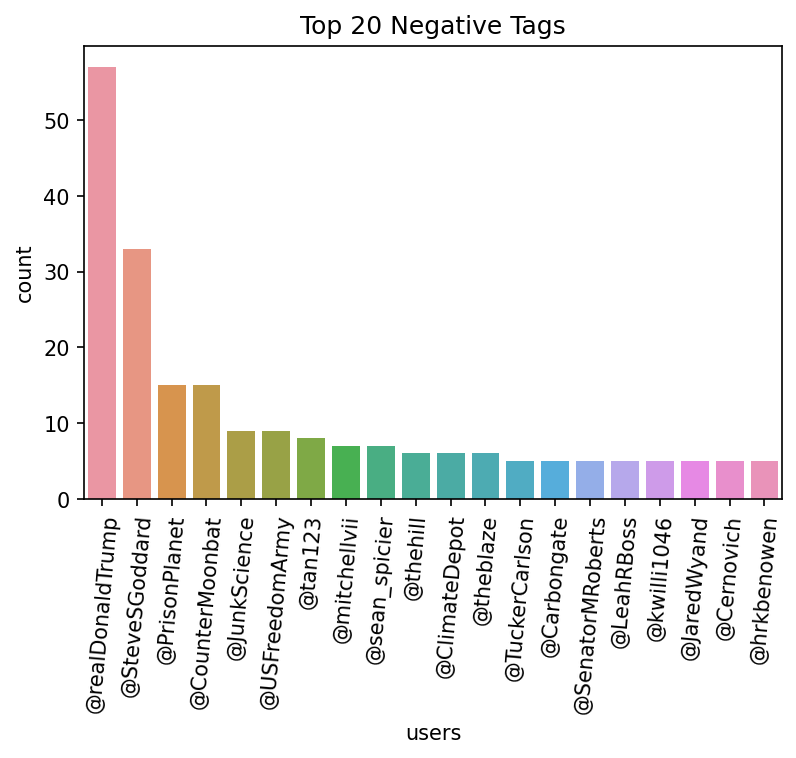

In [48]:
#plot for Negative tag
plt.figure(figsize = (6,4))
sns.countplot(x = "users", data = new_df[new_df['Analysis'] == 'Negative'],
              order = new_df[new_df['Analysis'] == 'Negative'].users.value_counts().iloc[:20].index) 

plt.title('Top 20 Negative Tags')
plt.xticks(rotation = 85)
plt.show()

### **Data cleaning**

Is the process of fixing or removing incorrect, corrupted, incorrectly formatted, duplicate, or incomplete data within a dataset.

## **Category 2:**

We will first do the data prepoccessing by cleaning the data, we will remove unecessary data that will after our modeling. This will help us avoid the overdrifting or underdrifting when predicting the model.

### **Step 1**:
Create a function what will:
* Remove the username of the user.
* Remove the url for websites or rt.
- Remove any Stop words and punctuations.

In [49]:
def remove_pattern(input_txt, pattern):
  '''The  function will take the first word as an input
          it will then create a pattern and once a match is found
          it will replace the input with a space'''
  # find the pattern of the input, e.g, @user or http://
  r = re.findall(pattern, input_txt)
  for i in r:
    # replaces the input with a white sapce
    input_txt = re.sub(i, '', input_txt)
      
  return input_txt

**Stemming and Lammatization**

* Stemming — In linguistic morphology and information retrieval, stemming is the process of reducing inflected words to their word stem, base, or root form — generally a written word form.

* Lemmatization — Lemmatisation in linguistics is the process of grouping together the inflected forms of a word so they can be analyzed as a single item, identified by the word’s lemma, or dictionary form.

In [50]:
def cleanup_text(input_text: str) -> str:
    """
    Apply some basic cleanup to the input text. 
    input takes the text as a string
    :param input_text: The input text.
    :return: The cleaned input text
    """
    text = input_text.lower()
    #changing the input_text to lower case
    '''Replacing words matching regular expressions
        : We are looking at the most regualr expressions'''
    
    text = re.sub(r"won't", 'will not', text)
    text = re.sub(r"can't", 'cannot', text)
    text = re.sub(r"i'm", 'i am', text)
    text = re.sub(r'ain\'t', 'is not', text)
    text = re.sub(r"doesn't", 'is does not', text)
    text = re.sub(r'(\w+)\'ll', '\g<1> will', text)
    text = re.sub(r'(\w+)n\'t', '\g<1> not', text)
    text = re.sub(r'(\w+)\'ve', '\g<1> have', text)
    text = re.sub(r'(\w+)\'s', '\g<1> is', text)
    text = re.sub(r'(\w+)\'re', '\g<1> are', text)
    text = re.sub(r'(\w+)\'d', '\g<1> would', text)

    text= re.sub('@[^\s]+','',text)
    text = re.sub('r<.*?>',' ', text)
    text = re.sub("^\s+|\s+$", "", text, flags=re.UNICODE)
    punctuation = re.compile("[.;:!\'’‘“”?,\"()\[\]]")
    text = punctuation.sub("", text.lower()) 
    nlp_stopwords = NLP(replace_words=True, remove_stopwords=True, remove_numbers=True, remove_punctuations=False) 
    text = nlp_stopwords.process(text)
    text = text.split()

    
    stemmer = PorterStemmer()
    
    pos = pos_tag(text)

    lemmatizer = WordNetLemmatizer()
    text = ' '.join([lemmatizer.lemmatize(word, po[0].lower()) if (po[0].lower() in ['n', 'r', 'v', 'a']\
                                                                   and word[0] != '@') else word for word, po in pos])

    return text

In [51]:
#Extracting # from the cleaned data
def hashtag_extract(tweets):
    hashtags = []
    # loop words in the tweet
    for tweet in tweets:
        ht = re.findall(r"#(\w+)", tweet)
        hashtags.append(ht)
    return hashtags

In [52]:
new_df['hashtag'] = hashtag_extract(new_df['message'])

In [53]:
hashy = sum(new_df['hashtag'], [])

In [54]:
freq = nltk.FreqDist(hashy)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                 'Count': list(freq.values())})
d.head()

Hashtag  Count
0   TodayinMaker      1
1  ElectionNight      8
2   climatemarch     18
3  SaveOurPlanet      1
4          COP22     75

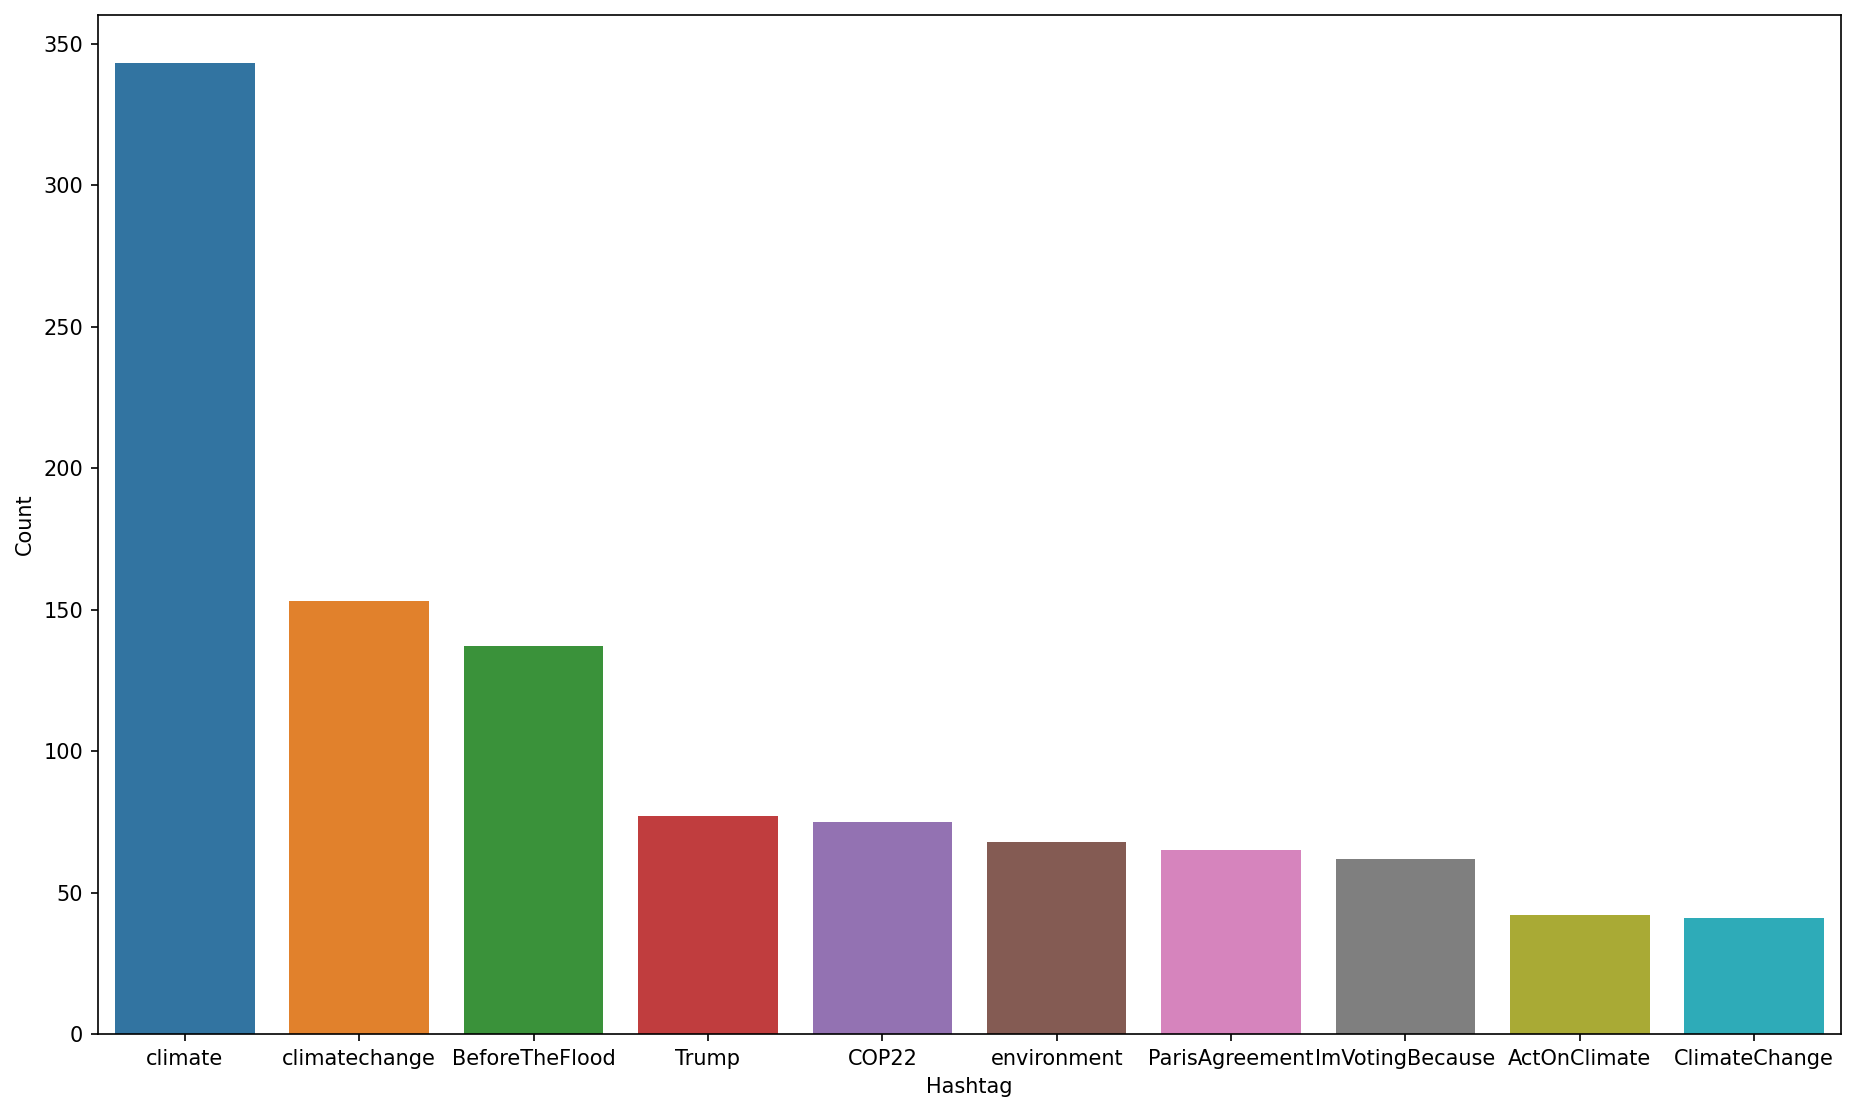

In [55]:
# select top 10 hashtags
d = d.nlargest(columns = 'Count', n = 10)
plt.figure(figsize = (15,9))
sns.barplot(data = d, x = 'Hashtag', y = 'Count')
plt.show()

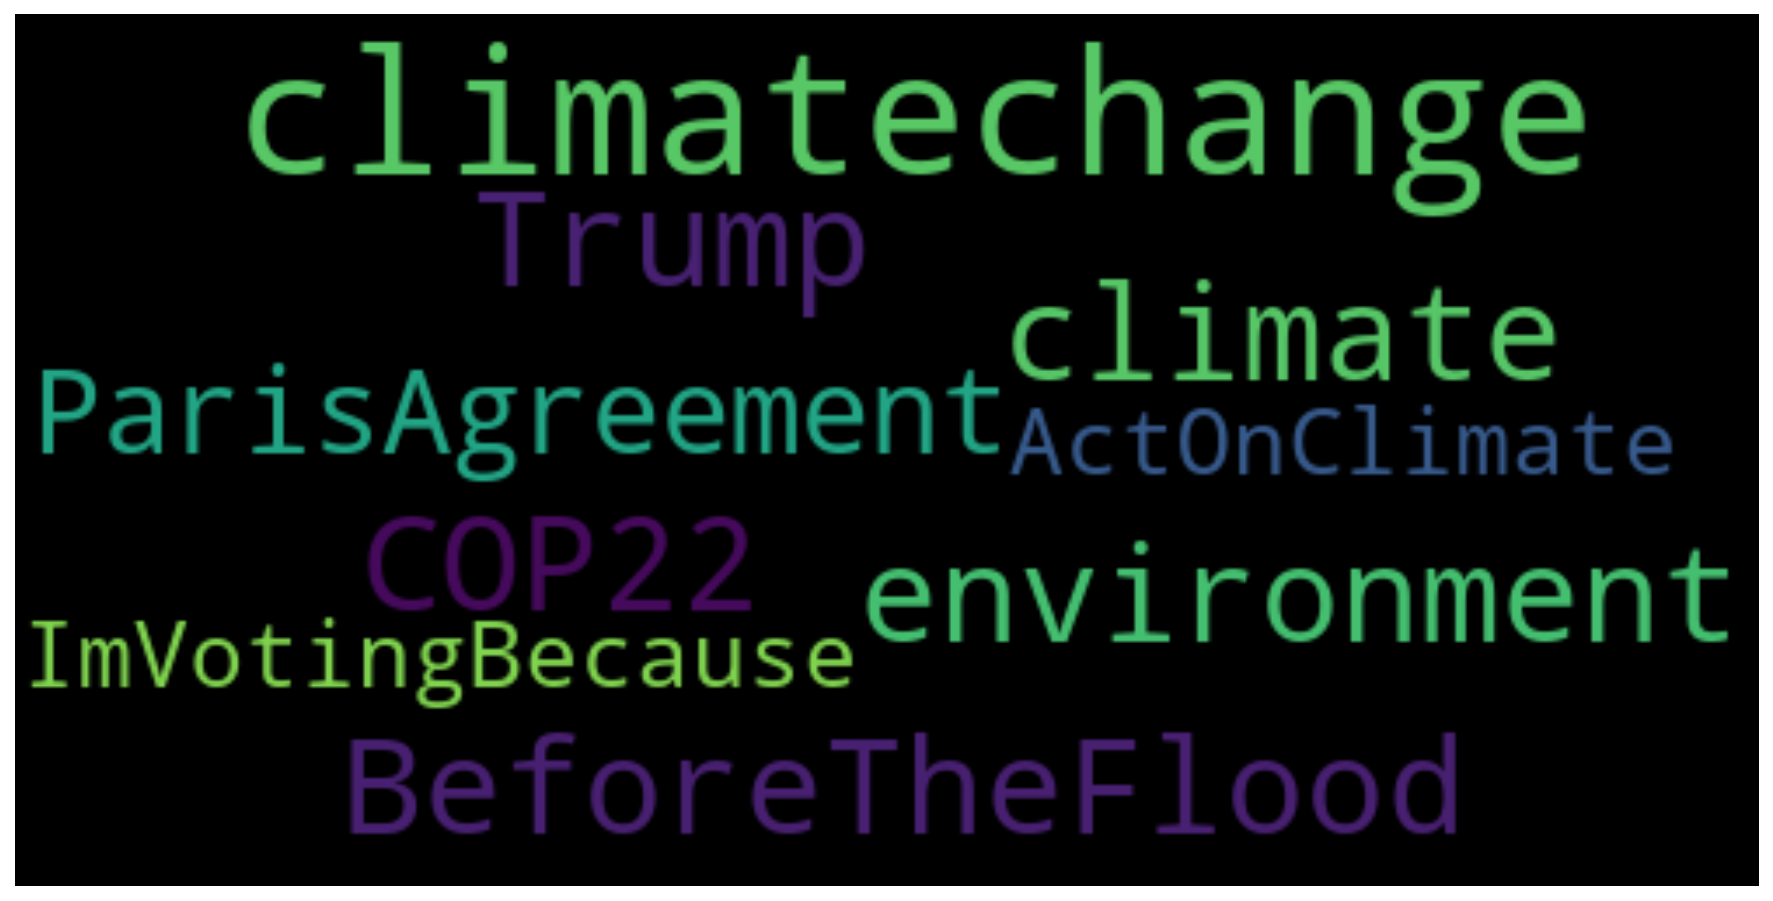

In [56]:
# visualize the frequent words
all_words = " ".join([sentence for sentence in d['Hashtag']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=500, height=250, random_state=42, max_font_size=50).generate(all_words)

#plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [57]:
from  sklearn.base import BaseEstimator, TransformerMixin

In [58]:
class clean_data(BaseEstimator,TransformerMixin):
    def __init__(self):
        pass
    def fit(self,x,y = None):
        return self

    def transform(self, x, y = None):
        # Removing the url links
        x['message'] = np.vectorize(remove_pattern)(x['message'], 'https://t.co/\w+')
        # Removing the retweets(RT)
        x['message'] = np.vectorize(remove_pattern)(x['message'], "RT")
        # Removing the whitespaces
        x['message'] = x['message'].str.replace('[^a-zA-Z#]', ' ')
        
        x['message'] = np.vectorize(remove_pattern)(x['message'], "https")
        x['message'] = x['message'].apply(cleanup_text)
        x['message'] = x['message'].str.replace(r'[^\w\s]+', '')
        return x

In [59]:
clean = clean_data()
new = clean.fit(new_df)
clean_df = new.transform(new_df)

In [60]:
clean_df

sentiment                                            message  tweetid  \
0              1  polyscimajor epa chief doesn t think carbon di...   625221   
1              1  s not like we lack evidence anthropogenic glob...   126103   
2              2  rawstory researcher say we three year act clim...   698562   
3              1  todayinmaker wire pivotal year in war climate ...   573736   
4              1  soynoviodetodas s and racist sexist climate ch...   466954   
...          ...                                                ...      ...   
15814          1  ezlusztig they take material global warming lg...    22001   
15815          2  washingtonpost how climate change could break ...    17856   
15816          0  notiven nytimesworld what trump actually belie...   384248   
15817         -1  sara smile hey liberal climate change crap hoa...   819732   
15818          0  chet cannon kurteichenwald s climate change eq...   806319   

       Analysis                        users          hashtag  
0      Positive                    @mashable               []  
1      Positive                          NaN               []  
2          News                    @RawStory               []  
3      Positive                          NaN   [TodayinMaker]  
4      Positive             @SoyNovioDeTodas  [ElectionNight]  
...         ...                          ...              ...  
15814  Positive                   @ezlusztig               []  
15815      News              @washingtonpost               []  
15816   Neutral                          NaN               []  
15817  Negative                 @sara8smiles     [Agenda2030]  
15818   Neutral  @Chet_Cannon@kurteichenwald               []  

[15819 rows x 6 columns]

In [61]:

# extract hashtags from negative tweets
#ht_negative = hashtag_extract(clean_df['message'][clean_df['sentiment']==-1])
# extract hashtags from neutral tweets
#ht_neutral = hashtag_extract(clean_df['message'][clean_df['sentiment']==0])
# extract hashtags from positive tweets
#ht_positive = hashtag_extract(clean_df['message'][clean_df['sentiment']==1])
# extract hashtags from news tweets
#ht_news = hashtag_extract(clean_df['message'][clean_df['sentiment']==2])
#ht_news = sum(ht_news, [])
#ht_positive = sum(ht_positive, [])
#ht_neutral = sum(ht_neutral, [])
#ht_negative = sum(ht_negative, [])

In [62]:
#freq = nltk.FreqDist(ht_positive)
#d = pd.DataFrame({'Hashtag': list(freq.keys()),
#                'Count': list(freq.values())})
#d.head()

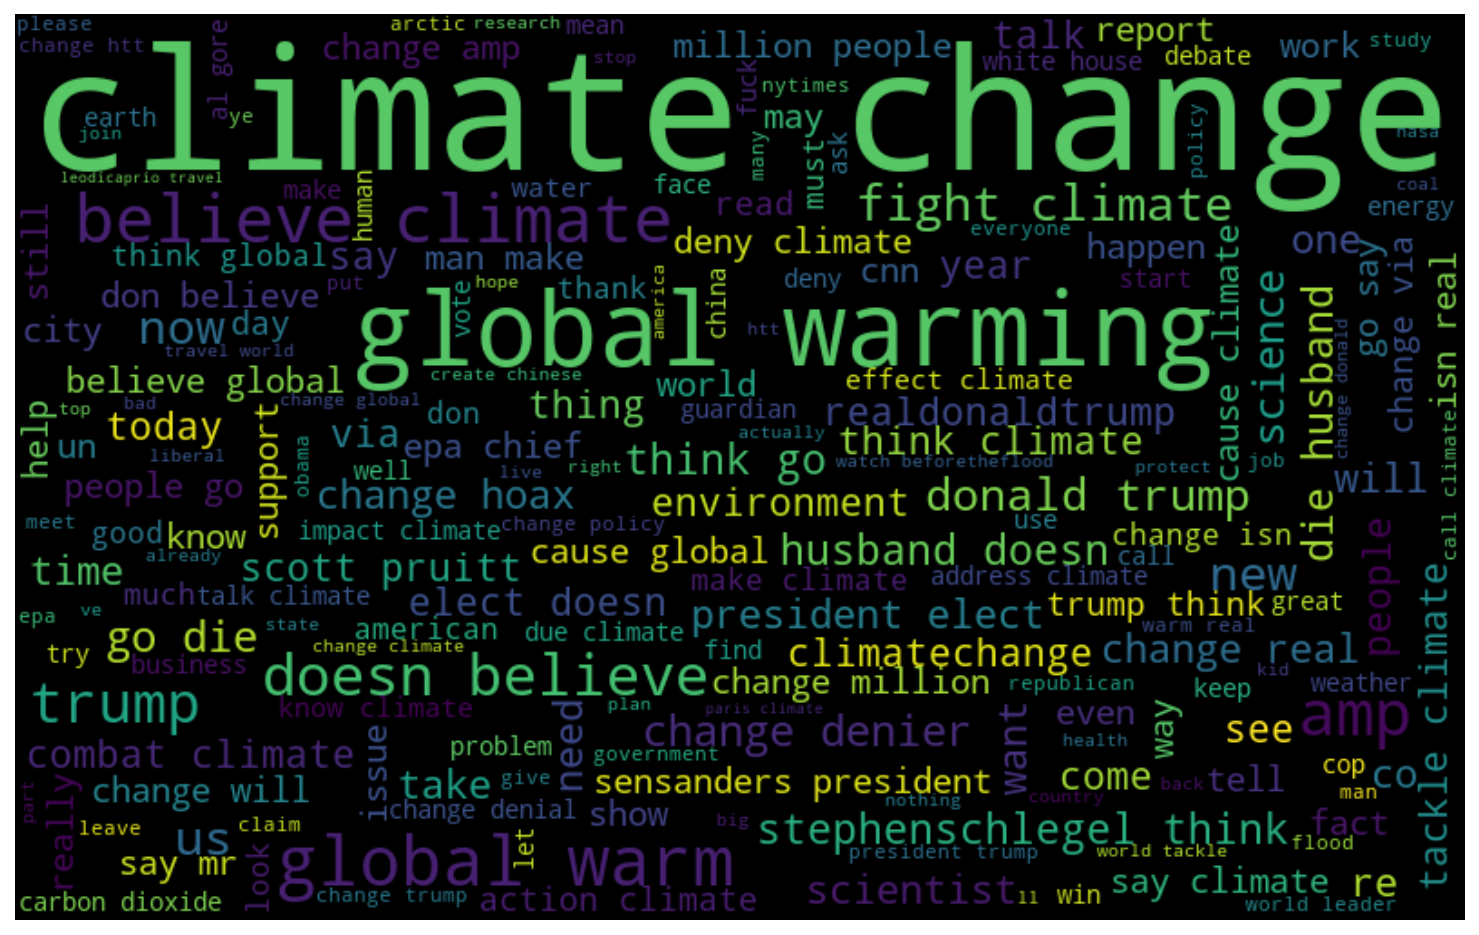

In [63]:
# visualize the frequent words for cleaned data
all_words = " ".join([sentence for sentence in clean_df['message']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [64]:
df = new_df.groupby('Analysis')
wc1 = " ".join(tags for tags in df.get_group('Positive').message)
wc2 = " ".join(tags for tags in df.get_group('News').message)
wc3 = " ".join(tags for tags in df.get_group('Negative').message)
wc0 = " ".join(tags for tags in df.get_group('Neutral').message)

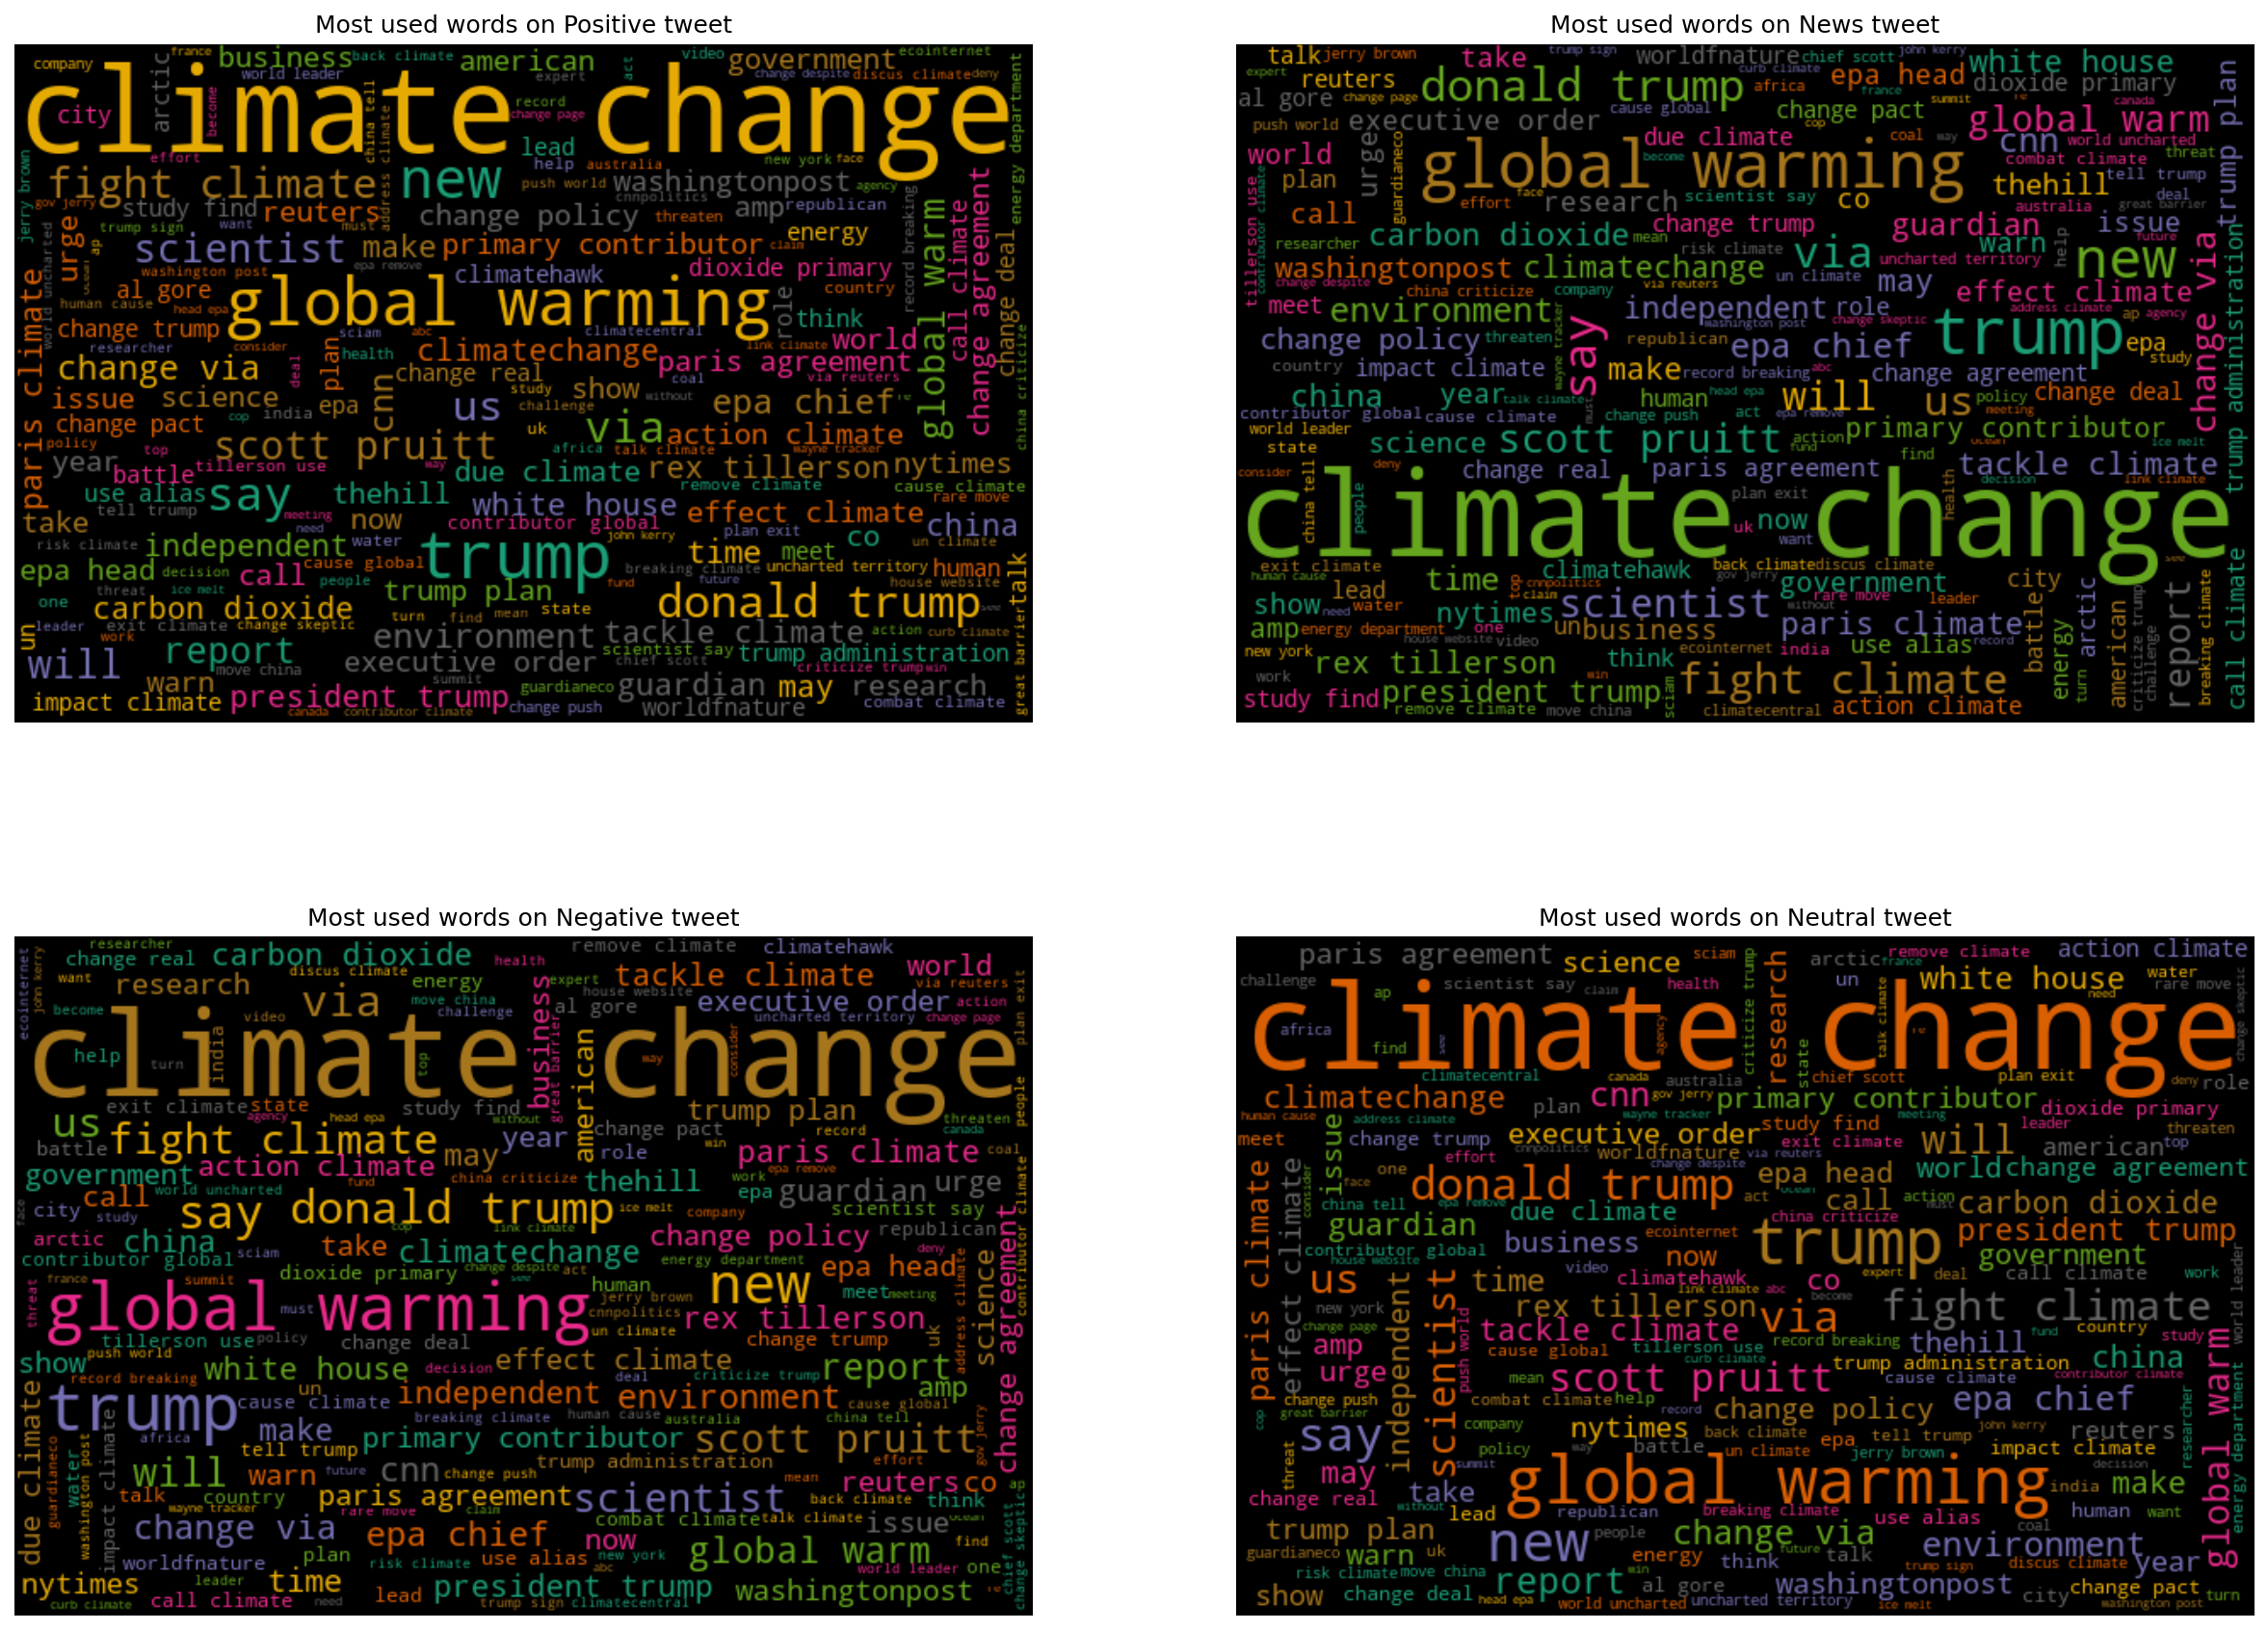

In [67]:
wc = WordCloud(width=600, height=400, 
               background_color='black', colormap='Dark2',
               max_font_size=150, random_state=42)

plt.rcParams['figure.figsize'] = [20, 15]
list_of_wc = [wc1, wc2,
              wc3, wc0]
titles = ['Most used words on Positive tweet', 'Most used words on News tweet', 
            'Most used words on Negative tweet', 'Most used words on Neutral tweet']

# Create subplots 
for i in range(0, len(list_of_wc)):
    wc.generate(list_of_wc[1])
    
    plt.subplot(2, 2, i + 1)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title(titles[i])
    
plt.show()

Lets plot a graph to 

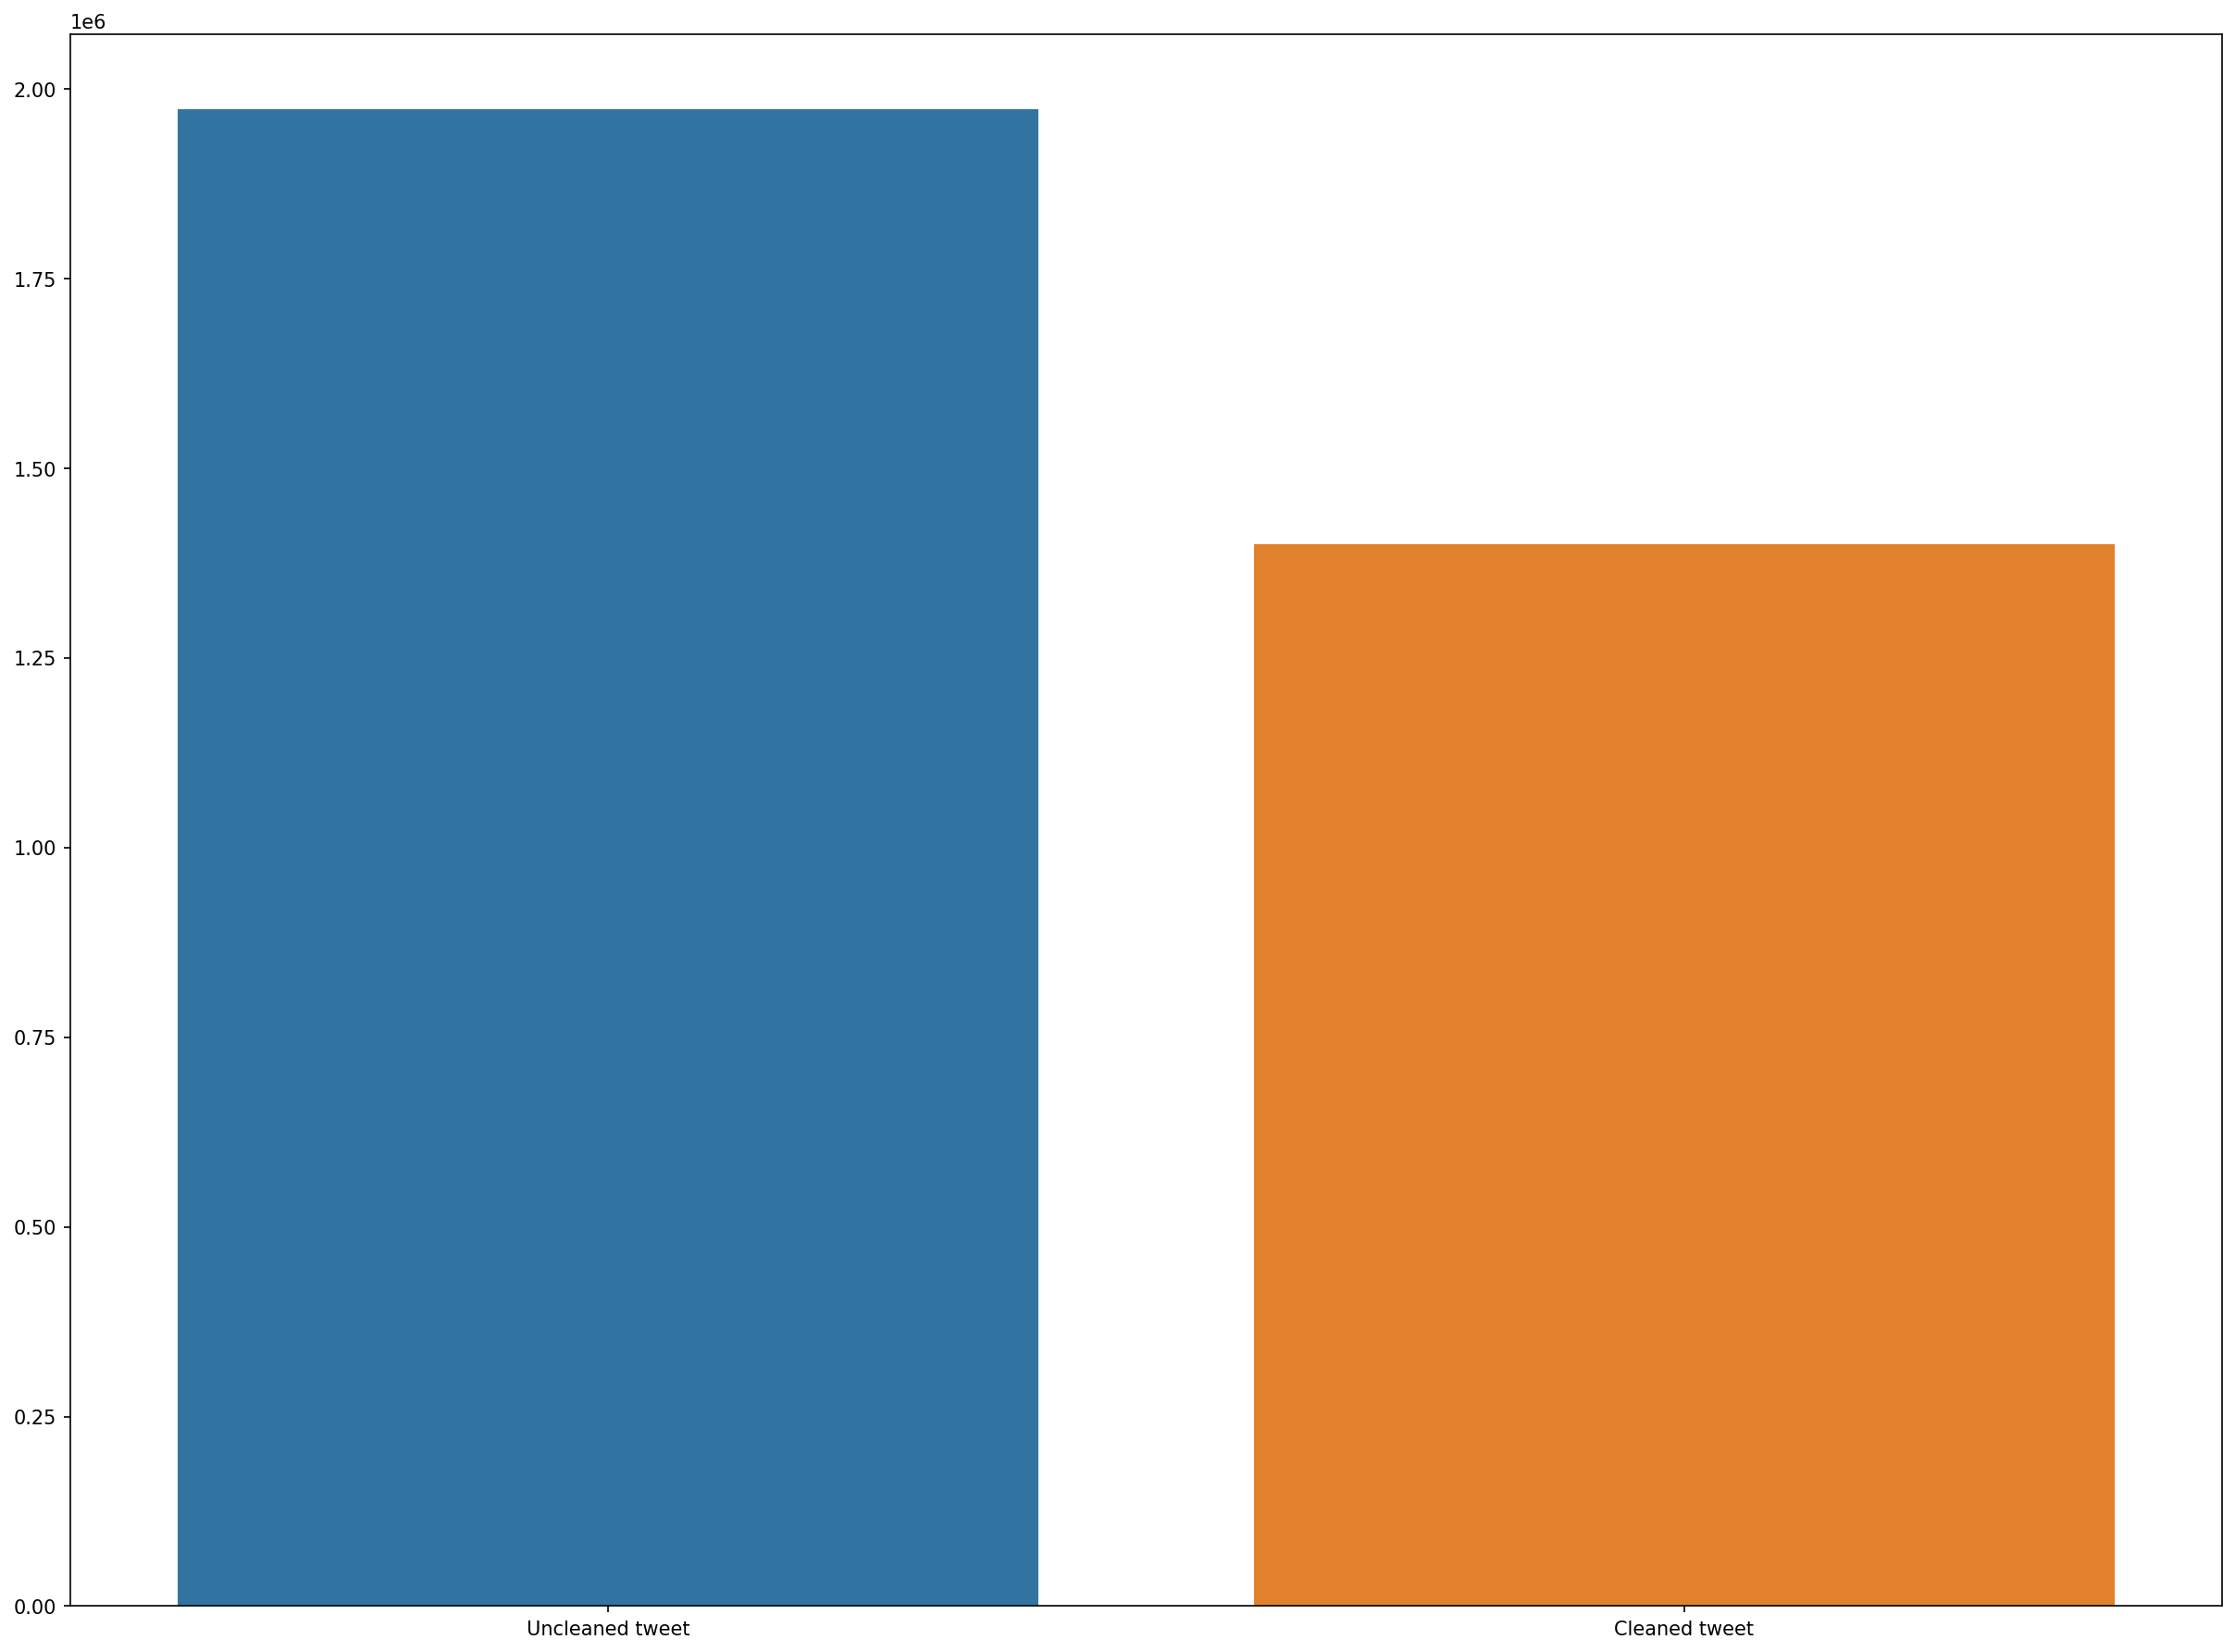

In [68]:
dirty_data = " ".join(tweet for tweet in train_df['message'])
cleaned_data = " ".join(tweet for tweet in clean_df['message'])


sns.barplot(x=['Uncleaned tweet', 'Cleaned tweet'], y=[len(dirty_data), len(cleaned_data)])
# sns.countplot(x=[] ,data = working_df, palette='PRGn')
# plt.xlabel('Sentiment')
plt.title('')
plt.show()

Before going to our feature engineering and selection, let us first take a look at the hashtags which i belive they will tell us a good story(analysis) compared to using the entire tweets. First we need to create a new column to exact the hashtags.

##**Category 3**:
 Balancing our data 
 In this case we will use resampling to help us balance our data.

 **Resampling** is is a tool consisting in repeatedly drawing samples from a dataset and calculating statistics and metrics on each of those samples in order to obtain further information about something, in the machine learning setting, this something is the performance of a model. \

From our previous analysis, we saw that positive sentiment has the largest count, we are now going to use the positive sentiment to resample all the remaing sentiments, this way i believe up resample will be the best option to reconsider in this situation so we could get a accurate data when modeling. We will follow the following steps.

**Stage 1:**
- Create a copy of the original data
- Create a resampling varaiable.

**Stage 2:**
- Seperate the data to each sentiment
- Introduce the resampling(up and down resampling)

**Stage 3:** 
- Create a new balanced Dataframe
- clean the Dataframe before model
- Proceed to modeling the balanced data


**Stage 1**

In [69]:
# First let our create another copy of our original data.
balance_data = train_df.copy()

In [70]:
#create a resampling variable
resample_data = int(len(balance_data[balance_data['sentiment']==1])/2)

Now that we conpleetd stage 1, let us now proceed to stage 2

**Stage 2**

In [71]:
#Seperating each sentiment
sentiment_1 = balance_data[balance_data['sentiment']==-1]
sentiment_2 = balance_data[balance_data['sentiment']==0]
sentiment_3 = balance_data[balance_data['sentiment']==1]
sentiment_4 = balance_data[balance_data['sentiment']==2]

 Now that we are done with seperating each sentiment, let us first see the meaning of down and up resampling before implementing them.
 
 **Downsampling** - taking a random subset of the majority class small enough to match the number of observations in the minority class.

**Upsampling** - taking repeated random samples from the minority class until we have as many observations as the  majority class. This grows the size of the minority class by effectively duplicating observations at random.

We now going to apply the up and down resampling to our data.
- First, up resample the data that of the negative, neutral and positive sentiments.
- Last, down resample the data of the positive sentiment.

In [72]:
# Upresampling the data 
up_resample1 = resample(sentiment_1,replace=True,n_samples=resample_data, random_state=42)
up_resample2 = resample(sentiment_2,replace=True,n_samples=resample_data, random_state=42)
up_resample3 = resample(sentiment_4,replace=True,n_samples=resample_data, random_state=42)
#Downsampling the data
down_resample1 = resample(sentiment_3,replace=False,n_samples=resample_data, random_state=42)

Now that we are done with stage 2, let us now apply the data in stage 2 to stage 3

**Stage 3:**

In [73]:
# Creating a new DataFrame for the balanced data
resampled_df = pd.concat([down_resample1, up_resample3, up_resample2,up_resample1])

In [74]:
resampled_df

sentiment                                            message  tweetid
4722           1  RT @NatGeoChannel: Watch #BeforeTheFlood right...   555359
14904          1  RT @SenSanders: We have a president-elect who ...   504402
12635          1  RT @OCTorg: Fed court has ruled rights of @oct...   559217
11307          1  RT @Aiannucci: The US elected Trump but the re...   936602
12348          1  RT @SenSanders: We have a president-elect who ...   639182
...          ...                                                ...      ...
10980         -1  @democracynow @SenWhitehouse Anthropogenic cli...   901823
14983         -1  RT @PolitixGal: Over past decade, global temps...   849994
732           -1  RT @RealJamesWoods: Do penises cause climate c...    33000
4445          -1  RT @goddersbloom: Man made apocryphal climate ...   310077
5524          -1  RT @JunkScience: We don't 'believe' in gravity...   598836

[17060 rows x 3 columns]

Before cleaning our data, let us first have a look at it to see if it is really balanced.We are going to create the visuals of the balanced data

Now that our data is balanced, We are then required to do feature engineering and selection, but before that, let us first have a lot at our balanced data before and after cleaning it, we will create a word cloud even thought it might not make sence at the moment but i believe it will give us a little insight of how our data looks like.

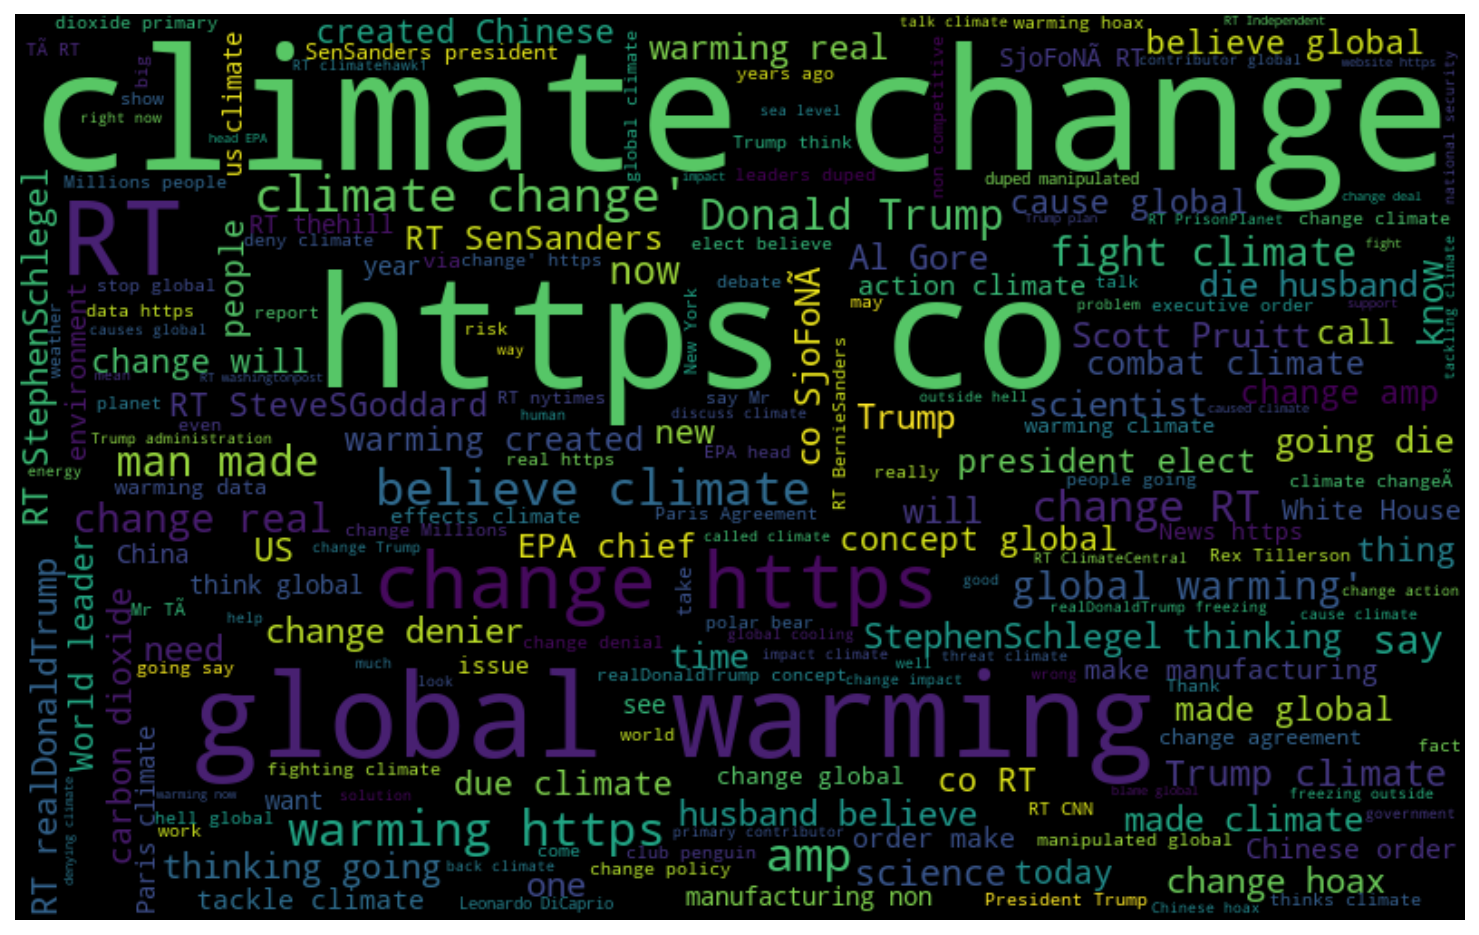

In [76]:
# visualize the frequent words for balanced data before cleaning 
all_words = " ".join([sentence for sentence in resampled_df['message']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


By the look of the word cloud, it seem as if the balancing of data has not affected, which means even our clean balanced data will be the similar to the word cloud of the clean unbalanced data.

<a class="anchor" id='#id-section6'></a>
# 6. **Feature Engineering and Selection**



Feature engineering is a machine learning technique that leverages data to create new variables that aren’t in the training set. \
In this section we going to use Bag of Word, CountVectorizer,TFIDF Vectorizer sparse to first turn our text data into numbers before modeling it. \
- **Vectorization** - count the number of times a word appears in the data which results in biasing in favour of most frequent words. this ends up in ignoring rare words which could have helped is in processing our data more efficiently.
**Bag if Words** - is a technique to extract features from the text.It focuses on the word count to represent a sentence and the order of the words in a sentence is not considered. 
- **TfidfVectorizer** - it considers overall data weightage of a word. It helps us in dealing with most frequent words and being able to penalize them. **TfidfVectorizer** weights the word counts by a measure of how often they appear in the documents.

In [77]:
class data_convert(BaseEstimator,TransformerMixin):
  def __init__(self):
    self.vectorizer = CountVectorizer(lowercase = True, ngram_range=(1, 3), analyzer='word')
    self.tfdfr=TfidfVectorizer(min_df = 1, use_idf=True, max_df=5)

  def fit(self, x, y= None):
    self.vectorizer.fit(x['message'])
    self.tfdfr.fit(x['message'])

    return self

  def transform(self,x,y=None):
    X = scipy.sparse.hstack([self.tfdfr.transform(x['message']), self.vectorizer.transform(x['message'])])
    return X


    

In [78]:
model_pipline = Pipeline([('clean_tweet', clean_data()),('tweet_convert',data_convert())])

The good thing about creating a pipeline is that you don't have to stress a lot when you have to clean, fit and transform your data, you can only do that with one line of coding which is amazing. For instance, when we will be working with the test_csv to make a kaggle submission we will not be worried about rewritting the codes we used to clean, fit and the transfrom the data, the only thing we would do is to call the pipeline and walaah it will easy things up, we will get to see that later on.

In [79]:
# DataFrame that will be used for modeling, the pipeline above will clean and fit our data copy
train = train_df.copy()

In [80]:
# We now cleaning, fitting and transforming the model at once.
x_pipline = model_pipline.fit_transform(train)

We can now see how our pipeline helped us with the above code of line, but we have not yet reached the interesting part of the test_csv data, for now it was just a clear demonstration of how pipelines make our lives easy.

In [81]:
#Selecting our features that will be used to train and test the modells
x = x_pipline
y = train_df['sentiment']

<a class="anchor" id='#id-section7'></a>
# 7. **Model Selection**

##**Training the model with unbalanced data**

In [82]:
# Splitting the previously defined features and label of your dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [83]:
#Logistic Regression model
model = [LogisticRegression(C = 1),SVC(kernel = 'linear', random_state = 5), SVC(kernel = 'rbf', random_state = 5),\
         MultinomialNB(), KNeighborsClassifier(n_neighbors=5, metric='minkowski',p=2),\
         DecisionTreeClassifier(max_depth=6),RandomForestClassifier(max_depth=5,n_estimators=100),\
         LogisticRegression(C=1, class_weight='balanced', max_iter=1000),LinearSVC(class_weight='balanced')]


In [84]:
len(model)

9

In [85]:
for i in range(0, len(model)):
  model_test = Pipeline([('model_pipelines', model[i])])
  model_test.fit(X_train, y_train)  
  predictions = model_test.predict(X_test)
  print(model[i])
  print(metrics.confusion_matrix(y_test,predictions))
  print(metrics.classification_report(y_test,predictions))
  print('F1_score: ',round(metrics.f1_score(y_test,predictions, average = 'weighted'),3))
  print('--------------------------------------------------------')

LogisticRegression(C=1)
[[ 133   52  136   15]
 [  16  223  259   49]
 [  17   70 1936  155]
 [   4   20  180  690]]
              precision    recall  f1-score   support

          -1       0.78      0.40      0.53       336
           0       0.61      0.41      0.49       547
           1       0.77      0.89      0.83      2178
           2       0.76      0.77      0.77       894

    accuracy                           0.75      3955
   macro avg       0.73      0.62      0.65      3955
weighted avg       0.75      0.75      0.74      3955

F1_score:  0.74
--------------------------------------------------------
SVC(kernel='linear', random_state=5)
[[ 143   56  122   15]
 [  19  256  237   35]
 [  22  118 1874  164]
 [   4   32  174  684]]
              precision    recall  f1-score   support

          -1       0.76      0.43      0.55       336
           0       0.55      0.47      0.51       547
           1       0.78      0.86      0.82      2178
           2       0.76     

COMET ERROR: Failed to extract parameters from estimator


DecisionTreeClassifier(max_depth=6)
[[  17    1  311    7]
 [   3   19  495   30]
 [   1    3 1997  177]
 [   0    1  631  262]]
              precision    recall  f1-score   support

          -1       0.81      0.05      0.10       336
           0       0.79      0.03      0.07       547
           1       0.58      0.92      0.71      2178
           2       0.55      0.29      0.38       894

    accuracy                           0.58      3955
   macro avg       0.68      0.32      0.31      3955
weighted avg       0.62      0.58      0.50      3955

F1_score:  0.496
--------------------------------------------------------
RandomForestClassifier(max_depth=5)
[[   0    0  336    0]
 [   0    0  547    0]
 [   0    0 2178    0]
 [   0    0  894    0]]
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       336
           0       0.00      0.00      0.00       547
           1       0.55      1.00      0.71      2178
           2    

##**Training the model with balanced data**

In [86]:
# Cleaning the balanced data
resampled_pipline = model_pipline.fit_transform(resampled_df)

In [87]:
#Selecting our features that will be used to train and test the models
w=resampled_pipline
z = resampled_df['sentiment']

In [88]:
# Splitting the previously defined features and label of your dataset
X_train, X_test, y_train, y_test = train_test_split(w, z, test_size=0.25, random_state=42)

In [89]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
# Saving each metric to add to a dictionary for logging



In [90]:
# Fitting models onto the training data and predicting.
fscore = []
pscore = []
rscore = []
ascore = []

for i in range(0, len(model)):
  text_clf = Pipeline([('model_pipelines', model[i]),])
  text_clf.fit(X_train, y_train)  
  predictions = text_clf.predict(X_test)

  # Saving each metric to add to a dictionary for logging
  f1 = f1_score(y_test, predictions, average='weighted')
  accuracy = accuracy_score(y_test, predictions)
  precision = precision_score(y_test, predictions,average='weighted')
  recall = recall_score(y_test, predictions, average='weighted')
  
  
  print(model[i])
  print(metrics.confusion_matrix(y_test, predictions))
  print(metrics.classification_report(y_test,predictions))
  print('F1_score: ',round(metrics.f1_score(y_test,predictions, average = 'weighted'),3))
  print('-------------------------------------------------------')

LogisticRegression(C=1)
[[ 990   28   14    4]
 [  24  967   48   40]
 [  27  110  800  139]
 [   8   18   44 1004]]
              precision    recall  f1-score   support

          -1       0.94      0.96      0.95      1036
           0       0.86      0.90      0.88      1079
           1       0.88      0.74      0.81      1076
           2       0.85      0.93      0.89      1074

    accuracy                           0.88      4265
   macro avg       0.88      0.88      0.88      4265
weighted avg       0.88      0.88      0.88      4265

F1_score:  0.88
-------------------------------------------------------
SVC(kernel='linear', random_state=5)
[[988  27  19   2]
 [ 26 976  52  25]
 [ 30 123 798 125]
 [  5  24  47 998]]
              precision    recall  f1-score   support

          -1       0.94      0.95      0.95      1036
           0       0.85      0.90      0.88      1079
           1       0.87      0.74      0.80      1076
           2       0.87      0.93      0.90  

In [91]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LinearSVC(), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)


Best cross-validation score: 0.86
Best parameters:  {'C': 0.1}


In [92]:
f1


0.8794440854397295

In [93]:
params = {"random_state": 42,
          "model_type": "logistic Regression",
          "scaler": "TfidfVectorizer",
          "param_grid": str(param_grid),
          "stratify": True
          }
metrics = {"f1": f1,
           "recall": recall,
           "precision": precision,
           "accuracy": accuracy
           }

# Log our parameters and results
experiment.log_parameters(params)
experiment.log_metrics(metrics)

In [94]:
experiment.end()

COMET WARNING: Couldn't retrieve Google Colab notebook content
COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/sizakele962/general/cdd724ae17354490902cc79192d424a6
COMET INFO:   Metrics:
COMET INFO:     accuracy  : 0.8813599062133646
COMET INFO:     f1        : 0.8794440854397295
COMET INFO:     precision : 0.8815135073699748
COMET INFO:     recall    : 0.8813599062133646
COMET INFO:   Others:
COMET INFO:     notebook_url : https://colab.research.google.com/notebook#fileId=1yzhbneX82K6qNBAFnPVrFCcg8dR1kXhx
COMET INFO:   Parameters:
COMET INFO:     C                                         : 0.1
COMET INFO:     algorithm                                 : auto
COMET INFO:     alpha                                     : 1.0
COMET INFO:     analyzer                                  : word
COMET INF

<a id="eight"></a>
# **8. Model Evaluation**
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description:  Model Selection ⚡ |
| :--------------------------- |
| In this section will section we will be doing model evaluation the notebook.

In [ ]:
LR = LogisticRegression(random_state = 5)

In [ ]:
import pickle
model_save_path = "CB1-Classfication-predict.pkl"
with open(model_save_path,"wb") as file:
    pickle.dump(LR,file)

In [ ]:
names = ['Logistic Regression','Linear-SVM', 
         'RBF-SVM','MultinomialNB', 'Nearest Neighbors',  'Decision Tree', 'Random Forest', 
         'Balanced Logistic Regression', 'Balanced Linear-SVC']

In [ ]:
classifiers = [LogisticRegression,Linear-SVC, RBF-SVC, MultinomialNB, KNeighbors, Decision Tree, Random Forest,\
               Balanced Logistic Regression,Balanced Linear-SVC]

In [98]:
Build_clissifiers = pd.DataFrame()
Build_clissifiers['Model'] = model
Build_clissifiers['Precision Score'] = pscore
Build_clissifiers['Recall Score'] = rscore
Build_clissifiers['Accuracy'] = ascore
Build_clissifiers['F1-Score'] = fscore


ValueError: ignored

<a class="anchor" id='#id-section9'></a>
# 9. **References**

# Kaggle code

In [ ]:
test_pred = model_pipline.transform(test_df)

In [ ]:
x_pr = test_df['tweetid']

In [ ]:
text_clf

In [ ]:
y_pred = text_clf.predict(test_pred)

In [ ]:
model_tests = pd.DataFrame()

model_tests['tweetid']=x_pr
model_tests['sentiment'] = y_pred

In [ ]:
model_tests.to_csv('CB1_submission.csv', index = False)

TF-IDF: https://www.researchgate.net/publication/346572350_COVID-19_Public_Tweets_Sentiment_Analysis_using_TF-IDF_and_Inductive_Learning_Models

Cleaning Data: https://www.youtube.com/watch?v=RLfUyn3HoaE&t=961s&ab_channel=HackersRealm